In [1]:
import numpy as np
import pandas as pd
import timeit
import matplotlib.pyplot as plt

%alias_magic t timeit

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

Created `%t` as an alias for `%timeit`.
Created `%%t` as an alias for `%%timeit`.


# Data

Importing our data, Including X and Y matrices.

Density contrust for 25 cutt-off radius for each particle: 

X = $(\delta(rc=0.3),
      \delta(rc=1.5),
      ...,
      \delta(rc=5.1)
      $

Being in (1) or out (0) of a halo with mass greater than $M_c$ in 0 redshift:

Y = 0 or 1


We have repeated runing this code for 20 $M_c$s in range 1600, 2600, 3600, ..., 20600 (in uints of particles' mass) and obtained features impotance histogram for all of them.
The most important feature and the boundary between in and out halo particles versus the feature is notable for us as $\delta_c$ the critical density contrast which is measured in a special $r_c$ for each $M_c$. 

In [41]:
data = pd.read_csv(r"C:\Users\Asus\Desktop\Universe\06Semester\Machine Learning\Thresholds\particles_information_11600.csv")
data.head()

,Unnamed: 0,id,rc=0.3,rc=0.5,rc=0.7,rc=0.9,rc=1.1,rc=1.3,rc=1.5,rc=1.7,...,rc=3.5,rc=3.7,rc=3.9,rc=4.1,rc=4.3,rc=4.5,rc=4.7,rc=4.9,rc=5.1,In_halo
0,0,8154682,2.711765,2.378432,4.655400,4.254975,2.492632,2.275564,1.822876,1.787347,...,1.314292,1.236861,1.192438,1.135081,1.103940,1.051957,1.024599,1.022772,0.991085,0
1,1,1354605,-1.917864,-1.621568,1.011085,0.825620,0.896088,0.454900,0.452506,0.540655,...,0.186012,0.104154,0.081917,0.012419,-0.009169,-0.008399,-0.104727,-0.067335,-0.076566,0
2,2,6607073,-6.547494,-0.621568,2.104380,2.540298,2.210889,2.901418,2.119173,2.168988,...,0.725371,0.469384,0.461222,0.389662,0.335140,0.371573,0.323887,0.242910,0.215553,0
3,3,13741884,11.971025,-0.621568,-0.082209,0.139749,0.332602,-0.569224,0.082136,-0.171741,...,-0.003492,-0.014299,-0.092985,-0.141743,-0.226131,-0.193584,-0.258835,-0.243707,-0.237704,0
4,4,3754460,7.341395,6.378432,-0.082209,0.311217,-0.230884,-0.000266,0.267321,0.133571,...,0.215167,0.195462,0.202030,0.119425,0.174777,0.143864,0.124028,0.121787,0.095879,0


In [42]:
Y, X = data.loc[:, 'In_halo'], data.iloc[:, 2:27]
print(X)
print(Y)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, random_state = 0) #, test_size = 0.3

print(len(X_train))
print(len(X_test))
print(len(Y), np.size(X))

          rc=0.3    rc=0.5    rc=0.7    rc=0.9    rc=1.1    rc=1.3    rc=1.5  \
0       2.711765  2.378432  4.655400  4.254975  2.492632  2.275564  1.822876   
1      -1.917864 -1.621568  1.011085  0.825620  0.896088  0.454900  0.452506   
2      -6.547494 -0.621568  2.104380  2.540298  2.210889  2.901418  2.119173   
3      11.971025 -0.621568 -0.082209  0.139749  0.332602 -0.569224  0.082136   
4       7.341395  6.378432 -0.082209  0.311217 -0.230884 -0.000266  0.267321   
...          ...       ...       ...       ...       ...       ...       ...   
59995   2.711765  6.378432  5.019831  4.083507  3.995261  3.185897  2.971025   
59996  -6.547494  3.378432  1.011085  1.854427  1.647403  0.966962  1.526580   
59997   7.341395  4.378432  1.375517 -0.717590 -2.672657 -2.276097 -2.251198   
59998   7.341395 -4.621568  1.011085  2.025894  0.614345  0.284213  0.971025   
59999   2.711765 -2.621568 -1.904367 -4.318413 -2.672657 -2.276097 -2.214161   

         rc=1.7    rc=1.9    rc=2.1  ..

In [43]:
#converting the dataframes to numpy arrays

X_test = np.array(X_test)
X_train = np.array(X_train)
Y_test = np.array(Y_test)
Y_train = np.array(Y_train)
X = np.array(X)
Y = np.array(Y)

# Training Model

## Random Forests

## Fine Tuning the model:

We should fine tune our model to get the best estimation for this purpose we need to find our hyperparameters.

Important hyperparameters of random forests includes:

n_estimators = number of trees in the foreset

max_features = max number of features considered for splitting a node

max_depth = max number of levels in each decision tree

min_samples_split = min number of data points placed in a node before the node is split

min_samples_leaf = min number of data points allowed in a leaf node

bootstrap = method for sampling data points (with or without replacement)

As the number of hyperparamethers are quite high we cannot find the optimal value of them by traditional method of validation curve, so for this case we can use the grid search methods.

We have used Random Hyperparameter Grid Search to find the best parameters.
This is important that we didn't changed these parameters for each $M_c$.


In [44]:
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y , train_size = 35000 , random_state= 0)

print(len(X_train))
print(len(X_test))
print(len(Y))

X_test = np.array(X_test)
X_train = np.array(X_train)
Y_test = np.array(Y_test)
Y_train = np.array(Y_train)
X = np.array(X)
Y = np.array(Y)

35000
25000
60000


In [45]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 1000, min_samples_split = 10, min_samples_leaf = 4, 
                                    max_features = 'sqrt', max_depth = 10, bootstrap = True, random_state=0)

%t classifier.fit(X_train , Y_train)

#Testing the classification on the test sample
Y_predict_rf = classifier.predict(X_test)
%t Y_predict_rf = classifier.predict(X_test)
print(len(Y_test))
print(len(Y_predict_rf[Y_predict_rf == 1]))

2min 22s ± 2.52 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
6.16 s ± 62.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
25000
5374


In [46]:
#Evaluating the new trained model:
from sklearn.metrics import classification_report
clf_report = classification_report(Y_test, Y_predict_rf)

print(clf_report)

              precision    recall  f1-score   support

           0       0.85      0.92      0.88     18074
           1       0.73      0.57      0.64      6926

    accuracy                           0.82     25000
   macro avg       0.79      0.74      0.76     25000
weighted avg       0.82      0.82      0.82     25000



## Feature Importance:

Random forests give us a great tool to estimate the importance of the each feature that we ae using in the classification problem and this task will give us quite great physical explanation of the most important features in our problem.

Here we computed the feature importances in this problem:

In [47]:
importance = classifier.feature_importances_
#np.savetxt("im4600.csv", importance, delimiter=",")
print(importance)


[0.00351725 0.00510815 0.00634205 0.00753678 0.00745508 0.00783546
 0.00866236 0.00856387 0.01059792 0.01265108 0.01548749 0.01660077
 0.02379068 0.02834686 0.04735597 0.07831502 0.10414787 0.13043616
 0.1361785  0.11034206 0.0745782  0.04995737 0.04528654 0.03253374
 0.02837277]


As we can see the velocity which is our last feature has small contribution in forming the classification.

A histogram of the importance of densities in different cut-offs is also showed below:

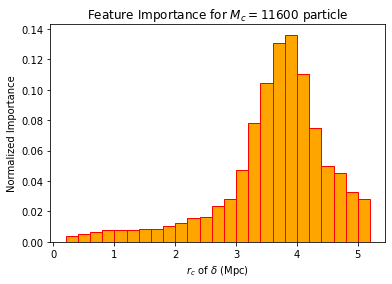

In [48]:
delta = np.array([0.3 , 0.5 , 0.7 , 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1, 2.3 , 2.5 , 2.7 , 2.9, 3.1, 3.3, 3.5 , 3.7, 3.9,
                  4.1, 4.3, 4.5, 4.7, 4.9, 5.1])
importance = np.array(importance)
plt.title('Feature Importance for $M_c=11600$ particle')
plt.bar(delta , importance, width = 0.2 , color = 'orange',edgecolor = 'red', capsize =0, linewidth = 1)
#plt.vlines(1.3, 0 , 0.2 , color = 'green', linestyles = 'dashed' , label = "IN-OUT boundary")
plt.xlabel('$r_c$ of $\delta$ (Mpc)')
plt.ylabel('Normalized Importance')
#plt.legend(loc = 'upper right')
#plt.savefig("4600FI.png")
plt.show()

In [49]:
np.savetxt("Y_pre_11.csv", Y_predict_rf, delimiter=",")
np.savetxt("X_test11.csv", X_test[:, 18], delimiter=",")

In [50]:
np.savetxt("Y_pre_5.csv", Y_pre_5, delimiter=",")
np.savetxt("X_test5.csv", X_test5, delimiter=",")

np.savetxt("Y_pre_4.csv", Y_pre_4, delimiter=",")
np.savetxt("X_test4.csv", X_test4, delimiter=",")

np.savetxt("Y_pre_3.csv", Y_pre_3, delimiter=",")
np.savetxt("X_test3.csv", X_test3, delimiter=",")

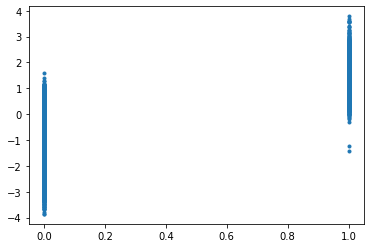

In [22]:
# plt.plot(Y_predict_rf, X_test[:, 13], '.')
# Y_pre_4 = Y_predict_rf
# X_test4 = X_test[:, 13]

In [ ]:
from sklearn.cluster import KMeans
